# Compare Water Balance Calculations between Pathways

Two pathways are used within the framework.

1. H0: null hypothesis of historical weather statistics
2. H1: alternative hypothesis of weather statistics extracted from down-scaled, global climate model results.

There are four analysis periods

1. Data Period: 1981-2010
2. Projection Period 1: 2011-2040
3. Projection Period 2: 2041-2070
4. Projection Period 3: 2071-2100

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
from math import floor, ceil

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# input directories and file roots
IN_DIR = r'C:\Temp\WG_Test_Out\Test3'
OUT_DIR = r'C:\Temp\WG_Test_Out\Test3\Processed'
IN_ROOT2 = "_DF.pickle"
OUT_ROOT = "DC_WGMN3"
NUMREAL = 10000
IN_ROOT1 = "Delta_%s_R" % OUT_ROOT

In [5]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [6]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [7]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [8]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [9]:
WB_In_Hdrs = [ "Precip_mm", "PET_mm", "AET_mm", "RO_mm", "Re_mm" ]

## Collate DataFrames

Go through all realizations and create a DataFrame for each constituent and each period

In [10]:
for rR in range( 1, NUMREAL + 1, 1 ):
    if ((rR % 500) == 0):
        print("Working on realization %d" % rR)
    # end if
    InFile = "%s%d%s" % ( IN_ROOT1, rR, IN_ROOT2 )
    InFP = os.path.normpath( os.path.join( IN_DIR, InFile ) )
    InDF = pd.read_pickle( InFP, compression='zip' )
    if rR <= 1:
        # data period
        Precip1 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        Precip1.columns = ["R_%d" % rR]
        PET1 = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        PET1.columns = ["R_%d" % rR]
        AET1 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        AET1.columns = ["R_%d" % rR]
        RO1 = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        RO1.columns = ["R_%d" % rR]
        RE1 = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        RE1.columns = ["R_%d" % rR]
        # Projection 1
        Precip2 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        Precip2.columns = ["R_%d" % rR]
        PET2 = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        PET2.columns = ["R_%d" % rR]
        AET2 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        AET2.columns = ["R_%d" % rR]
        RO2 = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        RO2.columns = ["R_%d" % rR]
        RE2 = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        RE2.columns = ["R_%d" % rR]
        # Projection 2
        Precip3 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        Precip3.columns = ["R_%d" % rR]
        PET3 = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        PET3.columns = ["R_%d" % rR]
        AET3 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        AET3.columns = ["R_%d" % rR]
        RO3 = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        RO3.columns = ["R_%d" % rR]
        RE3 = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        RE3.columns = ["R_%d" % rR]
        # Projection 3
        Precip4 = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        Precip4.columns = ["R_%d" % rR]
        PET4 = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        PET4.columns = ["R_%d" % rR]
        AET4 = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        AET4.columns = ["R_%d" % rR]
        RO4 = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        RO4.columns = ["R_%d" % rR]
        RE4 = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        RE4.columns = ["R_%d" % rR]
    else:
        # data period
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        Precip1 = Precip1.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpPET = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPET.columns = ["R_%d" % rR]
        PET1 = PET1.merge( tmpPET, how='inner', left_index=True, right_index=True )
        tmpAET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpAET.columns = ["R_%d" % rR]
        AET1 = AET1.merge( tmpAET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpRO.columns = ["R_%d" % rR]
        RO1 = RO1.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpRE.columns = ["R_%d" % rR]
        RE1 = RE1.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 1
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        Precip2 = Precip2.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpPET = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPET.columns = ["R_%d" % rR]
        PET2 = PET2.merge( tmpPET, how='inner', left_index=True, right_index=True )
        tmpAET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpAET.columns = ["R_%d" % rR]
        AET2 = AET2.merge( tmpAET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpRO.columns = ["R_%d" % rR]
        RO2 = RO2.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpRE.columns = ["R_%d" % rR]
        RE2 = RE2.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 2
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        Precip3 = Precip3.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpPET = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPET.columns = ["R_%d" % rR]
        PET3 = PET3.merge( tmpPET, how='inner', left_index=True, right_index=True )
        tmpAET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpAET.columns = ["R_%d" % rR]
        AET3 = AET3.merge( tmpAET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpRO.columns = ["R_%d" % rR]
        RO3 = RO3.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpRE.columns = ["R_%d" % rR]
        RE3 = RE3.merge( tmpRE, how='inner', left_index=True, right_index=True )
        # Projection 3
        tmpPre = InDF[[WB_In_Hdrs[0]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        Precip4 = Precip4.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpPET = InDF[[WB_In_Hdrs[1]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPET.columns = ["R_%d" % rR]
        PET4 = PET4.merge( tmpPET, how='inner', left_index=True, right_index=True )
        tmpAET = InDF[[WB_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpAET.columns = ["R_%d" % rR]
        AET4 = AET4.merge( tmpAET, how='inner', left_index=True, right_index=True )
        tmpRO = InDF[[WB_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpRO.columns = ["R_%d" % rR]
        RO4 = RO4.merge( tmpRO, how='inner', left_index=True, right_index=True )
        tmpRE = InDF[[WB_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpRE.columns = ["R_%d" % rR]
        RE4 = RE4.merge( tmpRE, how='inner', left_index=True, right_index=True )
    # end if
# end for

Working on realization 500
Working on realization 1000
Working on realization 1500
Working on realization 2000
Working on realization 2500
Working on realization 3000
Working on realization 3500
Working on realization 4000
Working on realization 4500
Working on realization 5000
Working on realization 5500
Working on realization 6000
Working on realization 6500
Working on realization 7000
Working on realization 7500
Working on realization 8000
Working on realization 8500
Working on realization 9000
Working on realization 9500
Working on realization 10000


In [11]:
display( HTML( Precip2.head().to_html() ) ) 

In [12]:
display( HTML( Precip4.tail().to_html() ) ) 

This loop takes a long time so output this files to pickles now

In [13]:
OFNamer = "Precip1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
Precip1.to_pickle( OFPath, compression='zip' )
OFNamer = "PET1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
PET1.to_pickle( OFPath, compression='zip' )
OFNamer = "AET1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
AET1.to_pickle( OFPath, compression='zip' )
OFNamer = "RO1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RO1.to_pickle( OFPath, compression='zip' )
OFNamer = "RE1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RE1.to_pickle( OFPath, compression='zip' )

In [14]:
OFNamer = "Precip2_%s.pickle"  % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
Precip2.to_pickle( OFPath, compression='zip' )
OFNamer = "PET2_%s.pickle"  % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
PET2.to_pickle( OFPath, compression='zip' )
OFNamer = "AET2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
AET2.to_pickle( OFPath, compression='zip' )
OFNamer = "RO2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RO2.to_pickle( OFPath, compression='zip' )
OFNamer = "RE2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RE2.to_pickle( OFPath, compression='zip' )

In [15]:
OFNamer = "Precip3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
Precip3.to_pickle( OFPath, compression='zip' )
OFNamer = "PET3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
PET3.to_pickle( OFPath, compression='zip' )
OFNamer = "AET3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
AET3.to_pickle( OFPath, compression='zip' )
OFNamer = "RO3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RO3.to_pickle( OFPath, compression='zip' )
OFNamer = "RE3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RE3.to_pickle( OFPath, compression='zip' )

In [16]:
OFNamer = "Precip4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
Precip4.to_pickle( OFPath, compression='zip' )
OFNamer = "PET4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
PET4.to_pickle( OFPath, compression='zip' )
OFNamer = "AET4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
AET4.to_pickle( OFPath, compression='zip' )
OFNamer = "RO4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RO4.to_pickle( OFPath, compression='zip' )
OFNamer = "RE4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
RE4.to_pickle( OFPath, compression='zip' )

## Calculate Time History Stats

Calculate the time history stats now for each DataFrame

In [17]:
DictPre1 = dict()
DictPre2 = dict()
DictPre3 = dict()
DictPre4 = dict()
DictPET1 = dict()
DictPET2 = dict()
DictPET3 = dict()
DictPET4 = dict()
DictAET1 = dict()
DictAET2 = dict()
DictAET3 = dict()
DictAET4 = dict()
DictRO1 = dict()
DictRO2 = dict()
DictRO3 = dict()
DictRO4 = dict()
DictRE1 = dict()
DictRE2 = dict()
DictRE3 = dict()
DictRE4 = dict()
hdrCnt = 0
# start out by doing the percentiles
for iI in range(NumQs):
    curQ = OurQs[iI]
    DictPre1[StatsHdsList[hdrCnt]] = Precip1.quantile( q=curQ, axis=1 ).to_numpy()
    DictPre2[StatsHdsList[hdrCnt]] = Precip2.quantile( q=curQ, axis=1 ).to_numpy()
    DictPre3[StatsHdsList[hdrCnt]] = Precip3.quantile( q=curQ, axis=1 ).to_numpy()
    DictPre4[StatsHdsList[hdrCnt]] = Precip4.quantile( q=curQ, axis=1 ).to_numpy()
    DictPET1[StatsHdsList[hdrCnt]] = PET1.quantile( q=curQ, axis=1 ).to_numpy()
    DictPET2[StatsHdsList[hdrCnt]] = PET2.quantile( q=curQ, axis=1 ).to_numpy()
    DictPET3[StatsHdsList[hdrCnt]] = PET3.quantile( q=curQ, axis=1 ).to_numpy()
    DictPET4[StatsHdsList[hdrCnt]] = PET4.quantile( q=curQ, axis=1 ).to_numpy()
    DictAET1[StatsHdsList[hdrCnt]] = AET1.quantile( q=curQ, axis=1 ).to_numpy()
    DictAET2[StatsHdsList[hdrCnt]] = AET2.quantile( q=curQ, axis=1 ).to_numpy()
    DictAET3[StatsHdsList[hdrCnt]] = AET3.quantile( q=curQ, axis=1 ).to_numpy()
    DictAET4[StatsHdsList[hdrCnt]] = AET4.quantile( q=curQ, axis=1 ).to_numpy()
    DictRO1[StatsHdsList[hdrCnt]] = RO1.quantile( q=curQ, axis=1 ).to_numpy()
    DictRO2[StatsHdsList[hdrCnt]] = RO2.quantile( q=curQ, axis=1 ).to_numpy()
    DictRO3[StatsHdsList[hdrCnt]] = RO3.quantile( q=curQ, axis=1 ).to_numpy()
    DictRO4[StatsHdsList[hdrCnt]] = RO4.quantile( q=curQ, axis=1 ).to_numpy()
    DictRE1[StatsHdsList[hdrCnt]] = RE1.quantile( q=curQ, axis=1 ).to_numpy()
    DictRE2[StatsHdsList[hdrCnt]] = RE2.quantile( q=curQ, axis=1 ).to_numpy()
    DictRE3[StatsHdsList[hdrCnt]] = RE3.quantile( q=curQ, axis=1 ).to_numpy()
    DictRE4[StatsHdsList[hdrCnt]] = RE4.quantile( q=curQ, axis=1 ).to_numpy()
    hdrCnt += 1
# end for
DictPre1[StatsHdsList[hdrCnt]] = Precip1.mean( axis=1 ).to_numpy()
DictPre2[StatsHdsList[hdrCnt]] = Precip2.mean( axis=1 ).to_numpy()
DictPre3[StatsHdsList[hdrCnt]] = Precip3.mean( axis=1 ).to_numpy()
DictPre4[StatsHdsList[hdrCnt]] = Precip4.mean( axis=1 ).to_numpy()
DictPET1[StatsHdsList[hdrCnt]] = PET1.mean( axis=1 ).to_numpy()
DictPET2[StatsHdsList[hdrCnt]] = PET2.mean( axis=1 ).to_numpy()
DictPET3[StatsHdsList[hdrCnt]] = PET3.mean( axis=1 ).to_numpy()
DictPET4[StatsHdsList[hdrCnt]] = PET4.mean( axis=1 ).to_numpy()
DictAET1[StatsHdsList[hdrCnt]] = AET1.mean( axis=1 ).to_numpy()
DictAET2[StatsHdsList[hdrCnt]] = AET2.mean( axis=1 ).to_numpy()
DictAET3[StatsHdsList[hdrCnt]] = AET3.mean( axis=1 ).to_numpy()
DictAET4[StatsHdsList[hdrCnt]] = AET4.mean( axis=1 ).to_numpy()
DictRO1[StatsHdsList[hdrCnt]] = RO1.mean( axis=1 ).to_numpy()
DictRO2[StatsHdsList[hdrCnt]] = RO2.mean( axis=1 ).to_numpy()
DictRO3[StatsHdsList[hdrCnt]] = RO3.mean( axis=1 ).to_numpy()
DictRO4[StatsHdsList[hdrCnt]] = RO4.mean( axis=1 ).to_numpy()
DictRE1[StatsHdsList[hdrCnt]] = RE1.mean( axis=1 ).to_numpy()
DictRE2[StatsHdsList[hdrCnt]] = RE2.mean( axis=1 ).to_numpy()
DictRE3[StatsHdsList[hdrCnt]] = RE3.mean( axis=1 ).to_numpy()
DictRE4[StatsHdsList[hdrCnt]] = RE4.mean( axis=1 ).to_numpy()
hdrCnt += 1

In [18]:
DictPre1[StatsHdsList[hdrCnt]] = Precip1.var( axis=1 ).to_numpy()
DictPre2[StatsHdsList[hdrCnt]] = Precip2.var( axis=1 ).to_numpy()
DictPre3[StatsHdsList[hdrCnt]] = Precip3.var( axis=1 ).to_numpy()
DictPre4[StatsHdsList[hdrCnt]] = Precip4.var( axis=1 ).to_numpy()
DictPET1[StatsHdsList[hdrCnt]] = PET1.var( axis=1 ).to_numpy()
DictPET2[StatsHdsList[hdrCnt]] = PET2.var( axis=1 ).to_numpy()
DictPET3[StatsHdsList[hdrCnt]] = PET3.var( axis=1 ).to_numpy()
DictPET4[StatsHdsList[hdrCnt]] = PET4.var( axis=1 ).to_numpy()
DictAET1[StatsHdsList[hdrCnt]] = AET1.var( axis=1 ).to_numpy()
DictAET2[StatsHdsList[hdrCnt]] = AET2.var( axis=1 ).to_numpy()
DictAET3[StatsHdsList[hdrCnt]] = AET3.var( axis=1 ).to_numpy()
DictAET4[StatsHdsList[hdrCnt]] = AET4.var( axis=1 ).to_numpy()
DictRO1[StatsHdsList[hdrCnt]] = RO1.var( axis=1 ).to_numpy()
DictRO2[StatsHdsList[hdrCnt]] = RO2.var( axis=1 ).to_numpy()
DictRO3[StatsHdsList[hdrCnt]] = RO3.var( axis=1 ).to_numpy()
DictRO4[StatsHdsList[hdrCnt]] = RO4.var( axis=1 ).to_numpy()
DictRE1[StatsHdsList[hdrCnt]] = RE1.var( axis=1 ).to_numpy()
DictRE2[StatsHdsList[hdrCnt]] = RE2.var( axis=1 ).to_numpy()
DictRE3[StatsHdsList[hdrCnt]] = RE3.var( axis=1 ).to_numpy()
DictRE4[StatsHdsList[hdrCnt]] = RE4.var( axis=1 ).to_numpy()
hdrCnt += 1

In [19]:
DictPre1[StatsHdsList[hdrCnt]] = Precip1.skew( axis=1 ).to_numpy()
DictPre2[StatsHdsList[hdrCnt]] = Precip2.skew( axis=1 ).to_numpy()
DictPre3[StatsHdsList[hdrCnt]] = Precip3.skew( axis=1 ).to_numpy()
DictPre4[StatsHdsList[hdrCnt]] = Precip4.skew( axis=1 ).to_numpy()
DictPET1[StatsHdsList[hdrCnt]] = PET1.skew( axis=1 ).to_numpy()
DictPET2[StatsHdsList[hdrCnt]] = PET2.skew( axis=1 ).to_numpy()
DictPET3[StatsHdsList[hdrCnt]] = PET3.skew( axis=1 ).to_numpy()
DictPET4[StatsHdsList[hdrCnt]] = PET4.skew( axis=1 ).to_numpy()
DictAET1[StatsHdsList[hdrCnt]] = AET1.skew( axis=1 ).to_numpy()
DictAET2[StatsHdsList[hdrCnt]] = AET2.skew( axis=1 ).to_numpy()
DictAET3[StatsHdsList[hdrCnt]] = AET3.skew( axis=1 ).to_numpy()
DictAET4[StatsHdsList[hdrCnt]] = AET4.skew( axis=1 ).to_numpy()
DictRO1[StatsHdsList[hdrCnt]] = RO1.skew( axis=1 ).to_numpy()
DictRO2[StatsHdsList[hdrCnt]] = RO2.skew( axis=1 ).to_numpy()
DictRO3[StatsHdsList[hdrCnt]] = RO3.skew( axis=1 ).to_numpy()
DictRO4[StatsHdsList[hdrCnt]] = RO4.skew( axis=1 ).to_numpy()
DictRE1[StatsHdsList[hdrCnt]] = RE1.skew( axis=1 ).to_numpy()
DictRE2[StatsHdsList[hdrCnt]] = RE2.skew( axis=1 ).to_numpy()
DictRE3[StatsHdsList[hdrCnt]] = RE3.skew( axis=1 ).to_numpy()
DictRE4[StatsHdsList[hdrCnt]] = RE4.skew( axis=1 ).to_numpy()
hdrCnt += 1

In [20]:
DictPre1[StatsHdsList[hdrCnt]] = Precip1.kurt( axis=1 ).to_numpy()
DictPre2[StatsHdsList[hdrCnt]] = Precip2.kurt( axis=1 ).to_numpy()
DictPre3[StatsHdsList[hdrCnt]] = Precip3.kurt( axis=1 ).to_numpy()
DictPre4[StatsHdsList[hdrCnt]] = Precip4.kurt( axis=1 ).to_numpy()
DictPET1[StatsHdsList[hdrCnt]] = PET1.kurt( axis=1 ).to_numpy()
DictPET2[StatsHdsList[hdrCnt]] = PET2.kurt( axis=1 ).to_numpy()
DictPET3[StatsHdsList[hdrCnt]] = PET3.kurt( axis=1 ).to_numpy()
DictPET4[StatsHdsList[hdrCnt]] = PET4.kurt( axis=1 ).to_numpy()
DictAET1[StatsHdsList[hdrCnt]] = AET1.kurt( axis=1 ).to_numpy()
DictAET2[StatsHdsList[hdrCnt]] = AET2.kurt( axis=1 ).to_numpy()
DictAET3[StatsHdsList[hdrCnt]] = AET3.kurt( axis=1 ).to_numpy()
DictAET4[StatsHdsList[hdrCnt]] = AET4.kurt( axis=1 ).to_numpy()
DictRO1[StatsHdsList[hdrCnt]] = RO1.kurt( axis=1 ).to_numpy()
DictRO2[StatsHdsList[hdrCnt]] = RO2.kurt( axis=1 ).to_numpy()
DictRO3[StatsHdsList[hdrCnt]] = RO3.kurt( axis=1 ).to_numpy()
DictRO4[StatsHdsList[hdrCnt]] = RO4.kurt( axis=1 ).to_numpy()
DictRE1[StatsHdsList[hdrCnt]] = RE1.kurt( axis=1 ).to_numpy()
DictRE2[StatsHdsList[hdrCnt]] = RE2.kurt( axis=1 ).to_numpy()
DictRE3[StatsHdsList[hdrCnt]] = RE3.kurt( axis=1 ).to_numpy()
DictRE4[StatsHdsList[hdrCnt]] = RE4.kurt( axis=1 ).to_numpy()

Make our DataFrames from the Stats

In [21]:
TimIndex1 = Precip1.index
TimIndex2 = Precip2.index
TimIndex3 = Precip3.index
TimIndex4 = Precip4.index

In [22]:
PreStats1 = pd.DataFrame(index=TimIndex1, data=DictPre1 )
PreStats2 = pd.DataFrame(index=TimIndex2, data=DictPre2 )
PreStats3 = pd.DataFrame(index=TimIndex3, data=DictPre3 )
PreStats4 = pd.DataFrame(index=TimIndex4, data=DictPre4 )

In [23]:
PETStats1 = pd.DataFrame(index=TimIndex1, data=DictPET1 )
PETStats2 = pd.DataFrame(index=TimIndex2, data=DictPET2 )
PETStats3 = pd.DataFrame(index=TimIndex3, data=DictPET3 )
PETStats4 = pd.DataFrame(index=TimIndex4, data=DictPET4 )

In [24]:
AETStats1 = pd.DataFrame(index=TimIndex1, data=DictAET1 )
AETStats2 = pd.DataFrame(index=TimIndex2, data=DictAET2 )
AETStats3 = pd.DataFrame(index=TimIndex3, data=DictAET3 )
AETStats4 = pd.DataFrame(index=TimIndex4, data=DictAET4 )

In [25]:
ROStats1 = pd.DataFrame(index=TimIndex1, data=DictRO1 )
ROStats2 = pd.DataFrame(index=TimIndex2, data=DictRO2 )
ROStats3 = pd.DataFrame(index=TimIndex3, data=DictRO3 )
ROStats4 = pd.DataFrame(index=TimIndex4, data=DictRO4 )

In [26]:
REStats1 = pd.DataFrame(index=TimIndex1, data=DictRE1 )
REStats2 = pd.DataFrame(index=TimIndex2, data=DictRE2 )
REStats3 = pd.DataFrame(index=TimIndex3, data=DictRE3 )
REStats4 = pd.DataFrame(index=TimIndex4, data=DictRE4 )

Output to a spreadsheet

In [27]:
OutFileName = "%s_ProcessMonthly_Stats.xlsx" % OUT_ROOT
OutFP = os.path.normpath( os.path.join( OUT_DIR, OutFileName ) )
with pd.ExcelWriter( OutFP ) as writer:
    PreStats1.to_excel( writer, sheet_name="Precip_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    PreStats2.to_excel( writer, sheet_name="Precip_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    PreStats3.to_excel( writer, sheet_name="Precip_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    PreStats4.to_excel( writer, sheet_name="Precip_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    PETStats1.to_excel( writer, sheet_name="PET_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    PETStats2.to_excel( writer, sheet_name="PET_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    PETStats3.to_excel( writer, sheet_name="PET_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    PETStats4.to_excel( writer, sheet_name="PET_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    AETStats1.to_excel( writer, sheet_name="AET_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    AETStats2.to_excel( writer, sheet_name="AET_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    AETStats3.to_excel( writer, sheet_name="AET_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    AETStats4.to_excel( writer, sheet_name="AET_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    ROStats1.to_excel( writer, sheet_name="RO_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    ROStats2.to_excel( writer, sheet_name="RO_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    ROStats3.to_excel( writer, sheet_name="RO_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    ROStats4.to_excel( writer, sheet_name="RO_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    REStats1.to_excel( writer, sheet_name="RE_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    REStats2.to_excel( writer, sheet_name="RE_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    REStats3.to_excel( writer, sheet_name="RE_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    REStats4.to_excel( writer, sheet_name="RE_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
# end with

## Time History Plots

### Precipitation

In [28]:
StatsHdsList[0]

'0_ptile'

In [29]:
MinPrecip = min( PreStats1[StatsHdsList[0]].min(), PreStats2[StatsHdsList[0]].min(), 
                 PreStats3[StatsHdsList[0]].min(), PreStats4[StatsHdsList[0]].min() )
MinPrecip

-51.303919351659715

In [30]:
MinPrecip = -1000.0

In [31]:
StatsHdsList[100]

'100_ptile'

In [32]:
MaxPrecip = max( PreStats1[StatsHdsList[100]].max(), PreStats2[StatsHdsList[100]].max(), 
                 PreStats3[StatsHdsList[100]].max(), PreStats4[StatsHdsList[100]].max() )
MaxPrecip

163.48061728669563

In [33]:
MaxPrecip = 2000.0

In [34]:
StatsHdsList[101]

'Average'

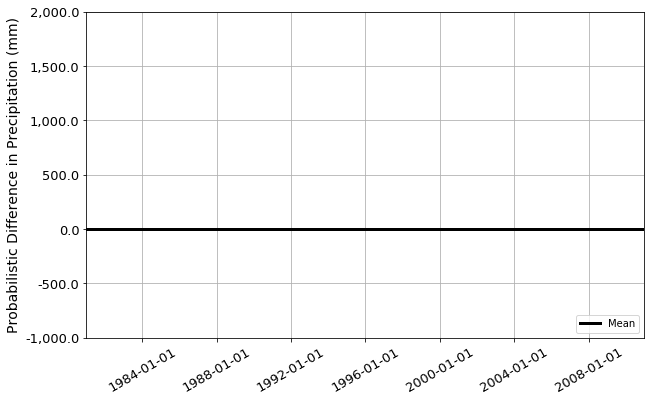

In [35]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PreStats1.index, PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:black', label='Mean' )
ax11.set_xlim( (TP_DICT[1][0], TP_DICT[1][1]))
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Probabilistic Difference in Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

In [36]:
StatsHdsList[50]

'50_ptile'

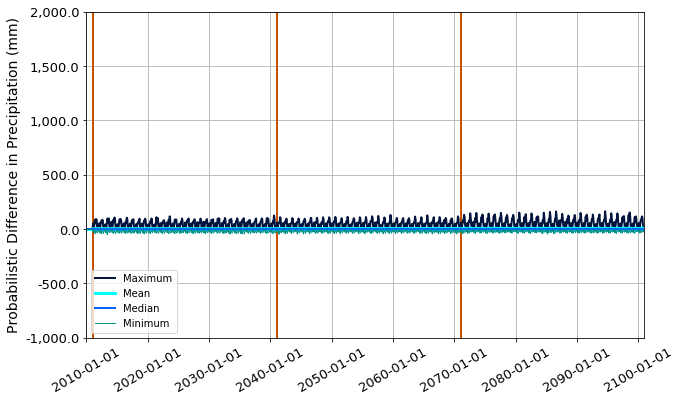

In [37]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( PreStats1.index, PreStats1[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='Maximum')
ax11.plot( PreStats2.index, PreStats2[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( PreStats3.index, PreStats3[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( PreStats4.index, PreStats4[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( PreStats1.index, PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( PreStats2.index, PreStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( PreStats3.index, PreStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( PreStats4.index, PreStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( PreStats1.index, PreStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( PreStats2.index, PreStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( PreStats3.index, PreStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( PreStats4.index, PreStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( PreStats1.index, PreStats1[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='Minimum' )
ax11.plot( PreStats2.index, PreStats2[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( PreStats3.index, PreStats3[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( PreStats4.index, PreStats4[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Probabilistic Difference in Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### PET

In [38]:
MinPET = min( PETStats1[StatsHdsList[0]].min(), PETStats2[StatsHdsList[0]].min(), 
              PETStats3[StatsHdsList[0]].min(), PETStats4[StatsHdsList[0]].min() )
MinPET

0.0

In [39]:
MinPET = -150.0

In [40]:
display( HTML( PETStats4.describe().to_html() ) )

In [41]:
MaxPET = max( PETStats1[StatsHdsList[100]].max(), PETStats2[StatsHdsList[100]].max(), 
              PETStats3[StatsHdsList[100]].max(), PETStats4[StatsHdsList[100]].max() )
MaxPET

29.396403980600894

In [42]:
MaxPET = 150.0

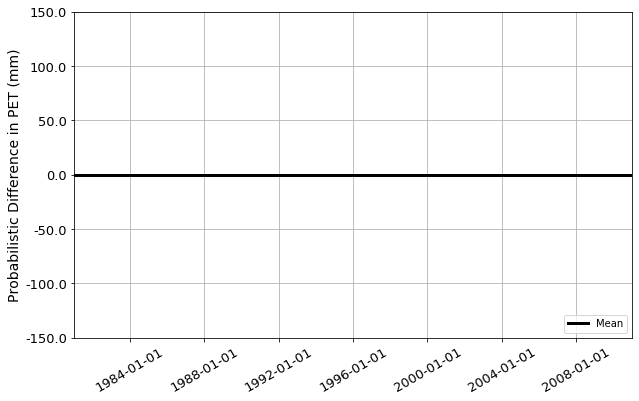

In [43]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PETStats1.index, PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:black', label='Mean' )
ax11.set_xlim( (TP_DICT[1][0], TP_DICT[1][1]))
ax11.set_ylim( (MinPET, MaxPET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in PET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

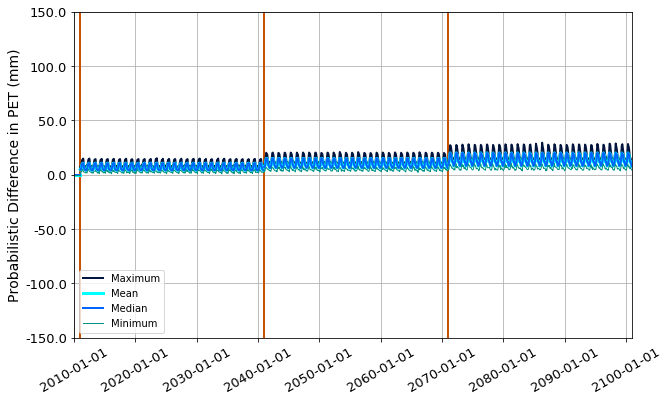

In [44]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( PETStats1.index, PETStats1[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='Maximum')
ax11.plot( PETStats2.index, PETStats2[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( PETStats3.index, PETStats3[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( PETStats4.index, PETStats4[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( PETStats1.index, PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( PETStats2.index, PETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( PETStats3.index, PETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( PETStats4.index, PETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( PETStats1.index, PETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( PETStats2.index, PETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( PETStats3.index, PETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( PETStats4.index, PETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( PETStats1.index, PETStats1[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='Minimum' )
ax11.plot( PETStats2.index, PETStats2[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( PETStats3.index, PETStats3[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( PETStats4.index, PETStats4[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinPET, MaxPET) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Probabilistic Difference in PET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### AET

In [45]:
MinAET = min( AETStats1[StatsHdsList[0]].min(), AETStats2[StatsHdsList[0]].min(), 
              AETStats3[StatsHdsList[0]].min(), AETStats4[StatsHdsList[0]].min() )
MinAET

-41.903535182872076

In [46]:
MinAET = -200

In [47]:
MaxAET = max( AETStats1[StatsHdsList[100]].max(), AETStats2[StatsHdsList[100]].max(), 
              AETStats3[StatsHdsList[100]].max(), AETStats4[StatsHdsList[100]].max() )
MaxAET

68.15944987630428

In [48]:
MaxAET = 250

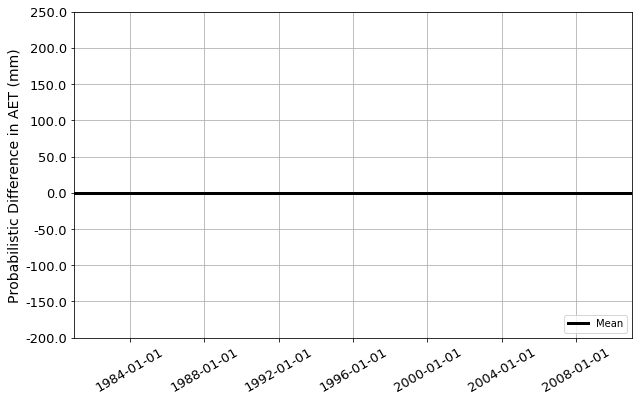

In [49]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AETStats1.index, AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:black', label='Mean' )
ax11.set_xlim( (TP_DICT[1][0], TP_DICT[1][1]))
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in AET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

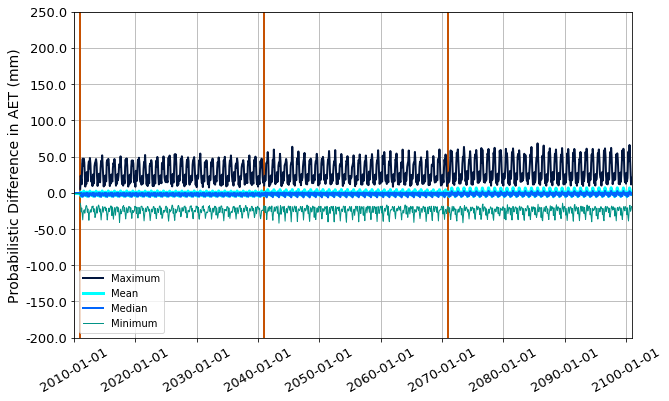

In [50]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( AETStats1.index, AETStats1[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='Maximum')
ax11.plot( AETStats2.index, AETStats2[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( AETStats3.index, AETStats3[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( AETStats4.index, AETStats4[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( AETStats1.index, AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( AETStats2.index, AETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( AETStats3.index, AETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( AETStats4.index, AETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( AETStats1.index, AETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( AETStats2.index, AETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( AETStats3.index, AETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( AETStats4.index, AETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( AETStats1.index, AETStats1[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='Minimum' )
ax11.plot( AETStats2.index, AETStats2[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( AETStats3.index, AETStats3[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( AETStats4.index, AETStats4[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Probabilistic Difference in AET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Runoff (RO)

In [51]:
MinRO = min( ROStats1[StatsHdsList[0]].min(), ROStats2[StatsHdsList[0]].min(), 
             ROStats3[StatsHdsList[0]].min(), ROStats4[StatsHdsList[0]].min() )
MinRO

-3.041871853879844

In [52]:
MinRO = -20

In [53]:
MaxRO = max( ROStats1[StatsHdsList[100]].max(), ROStats2[StatsHdsList[100]].max(), 
              ROStats3[StatsHdsList[100]].max(), ROStats4[StatsHdsList[100]].max() )
MaxRO

4.830787984860686

In [54]:
MaxRO = 80

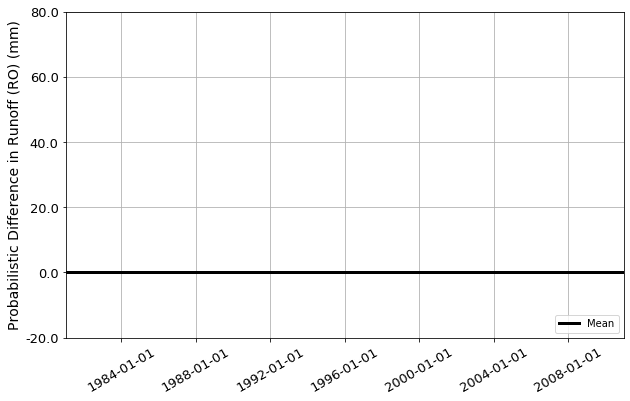

In [55]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( ROStats1.index, ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:black', label='Mean' )
ax11.set_xlim( (TP_DICT[1][0], TP_DICT[1][1]))
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Runoff (RO) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

In [56]:
FillIndex = list( ROStats1.index.to_pydatetime() )
FillValues = ROStats1[StatsHdsList[25]].tolist()
FillIndex.extend( list(ROStats2.index.to_pydatetime() ) )
FillValues.extend( ROStats2[StatsHdsList[25]].tolist() )
FillIndex.extend( list(ROStats3.index.to_pydatetime() ) )
FillValues.extend( ROStats3[StatsHdsList[25]].tolist() )
FillIndex.extend( list(ROStats4.index.to_pydatetime() ) )
FillValues.extend( ROStats4[StatsHdsList[25]].tolist() )

In [57]:
tmpList1 = list(ROStats4.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = ROStats4[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]

In [58]:
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )
tmpList1 = list(ROStats3.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = ROStats3[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )
tmpList1 = list(ROStats2.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = ROStats2[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )
tmpList1 = list(ROStats1.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = ROStats2[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )

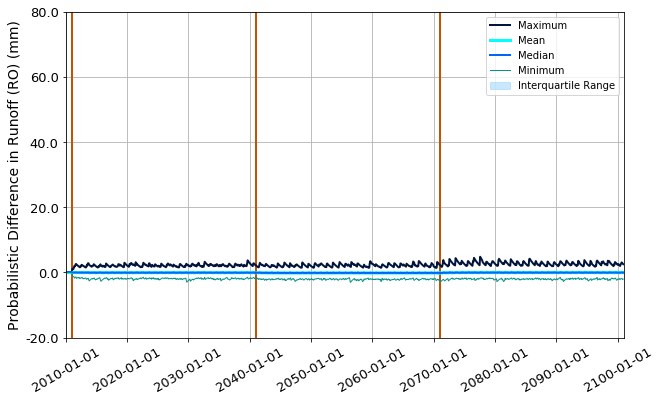

In [59]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.fill( FillIndex, FillValues, color="xkcd:light blue", alpha=0.5, 
           label="Interquartile Range")
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( ROStats1.index, ROStats1[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='Maximum')
ax11.plot( ROStats2.index, ROStats2[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( ROStats3.index, ROStats3[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( ROStats4.index, ROStats4[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( ROStats1.index, ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( ROStats2.index, ROStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( ROStats3.index, ROStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( ROStats4.index, ROStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( ROStats1.index, ROStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( ROStats2.index, ROStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( ROStats3.index, ROStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( ROStats4.index, ROStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( ROStats1.index, ROStats1[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='Minimum' )
ax11.plot( ROStats2.index, ROStats2[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( ROStats3.index, ROStats3[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( ROStats4.index, ROStats4[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Probabilistic Difference in Runoff (RO) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Recharge (RE)

In [60]:
MinRE = min( REStats1[StatsHdsList[0]].min(), REStats2[StatsHdsList[0]].min(), 
             REStats3[StatsHdsList[0]].min(), REStats4[StatsHdsList[0]].min() )
MinRE

-4.508054087449929

In [61]:
MinRE = -30.0

In [62]:
MaxRE = max( REStats1[StatsHdsList[100]].max(), REStats2[StatsHdsList[100]].max(), 
              REStats3[StatsHdsList[100]].max(), REStats4[StatsHdsList[100]].max() )
MaxRE

7.159227793563538

In [63]:
MaxRE = 120.0

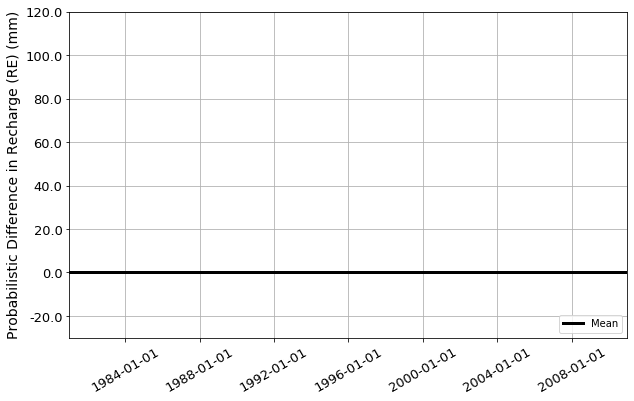

In [64]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( REStats1.index, REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:black', label='Mean' )
ax11.set_xlim( (TP_DICT[1][0], TP_DICT[1][1]))
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Recharge (RE) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

In [65]:
StatsHdsList[25], StatsHdsList[75]

('25_ptile', '75_ptile')

In [66]:
FillIndex = list( REStats1.index.to_pydatetime() )
FillValues = REStats1[StatsHdsList[25]].tolist()
FillIndex.extend( list(REStats2.index.to_pydatetime() ) )
FillValues.extend( REStats2[StatsHdsList[25]].tolist() )
FillIndex.extend( list(REStats3.index.to_pydatetime() ) )
FillValues.extend( REStats3[StatsHdsList[25]].tolist() )
FillIndex.extend( list(REStats4.index.to_pydatetime() ) )
FillValues.extend( REStats4[StatsHdsList[25]].tolist() )

In [67]:
len(FillIndex)

1440

In [68]:
type( FillIndex )

list

In [69]:
tmpList1 = list(REStats4.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = REStats4[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]
tmpList2[:5]

[datetime.datetime(2100, 12, 1, 0, 0),
 datetime.datetime(2100, 11, 1, 0, 0),
 datetime.datetime(2100, 10, 1, 0, 0),
 datetime.datetime(2100, 9, 1, 0, 0),
 datetime.datetime(2100, 8, 1, 0, 0)]

In [70]:
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )
tmpList1 = list(REStats3.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = REStats3[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )
tmpList1 = list(REStats2.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = REStats2[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )
tmpList1 = list(REStats1.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
tmpList3 = REStats2[StatsHdsList[75]].tolist()
tmpList4 = tmpList3[::-1]
FillIndex.extend( tmpList2 )
FillValues.extend( tmpList4 )

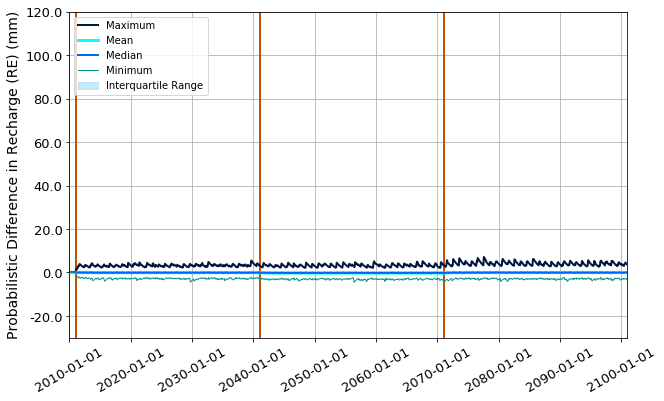

In [71]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.fill( FillIndex, FillValues, color="xkcd:light blue", alpha=0.5, 
           label="Interquartile Range")
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( REStats1.index, REStats1[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='Maximum')
ax11.plot( REStats2.index, REStats2[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( REStats3.index, REStats3[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( REStats4.index, REStats4[StatsHdsList[100]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( REStats1.index, REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( REStats2.index, REStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( REStats3.index, REStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( REStats4.index, REStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( REStats1.index, REStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( REStats2.index, REStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( REStats3.index, REStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( REStats4.index, REStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( REStats1.index, REStats1[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='Minimum' )
ax11.plot( REStats2.index, REStats2[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( REStats3.index, REStats3[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( REStats4.index, REStats4[StatsHdsList[0]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Recharge (RE) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )